In [2]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# Import data
training = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')

In [4]:
training


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.7,3.2,1.3,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,4.9,3.1,1.5,0.1,setosa
5,5.4,3.7,1.5,0.2,setosa
6,4.8,3.4,1.6,0.2,setosa
7,4.8,3.0,1.4,0.1,setosa
8,5.8,4.0,1.2,0.2,setosa
9,5.7,4.4,1.5,0.4,setosa


In [5]:
test


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.4,1.5,0.2,setosa
4,4.4,2.9,1.4,0.2,setosa
5,4.3,3.0,1.1,0.1,setosa
6,5.1,3.8,1.5,0.3,setosa
7,5.0,3.0,1.6,0.2,setosa
8,4.8,3.1,1.6,0.2,setosa
9,5.5,3.5,1.3,0.2,setosa


In [6]:
# Create the X, Y, Training and Test
xtrain = training.drop('Species', axis=1)
ytrain = training.loc[:, 'Species']
xtest = test.drop('Species', axis=1)
ytest = test.loc[:, 'Species']

In [7]:
#Init the Gaussian Classifier
model = GaussianNB()

In [8]:
# Train the model 
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
# Predict Output 
pred = model.predict(xtest)

In [10]:
pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype='<U10')

Text(89.18, 0.5, 'Predicted')

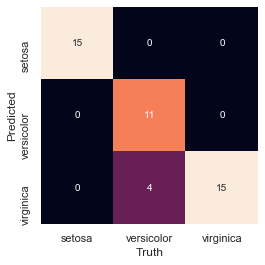

In [11]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [12]:
mat

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  4, 15]], dtype=int64)

In [13]:
print("Test Accuracy: ",model.score(xtest,ytest))

Test Accuracy:  0.9111111111111111


In [14]:
print("Train Accuracy: ",model.score(xtrain,ytrain))

Train Accuracy:  0.9523809523809523
